## Amarcord Case Working Notebook

In [53]:
path = 'C:/users/mohdh/Documents/MSBA/Time Series/hbs_cases/amarcord_1/'

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as datetime
np.set_printoptions(suppress=True)

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12,6

import os, sys
sys.path.append('C:/users/mohdh/Documents/MSBA/python modules/')
import preprocessing
module_path = os.path.abspath(os.path.join('../../MSBA/time_series_20191113/modules/'))
if module_path not in sys.path:
    sys.path.append(module_path)
import testing

In [296]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12,6

Note: `iloc[:,:]` added to get rid of empty cells read in.

In [297]:
monthly_data = pd.read_csv(path+'monthly_wires.csv').iloc[:12,:8]

In [298]:
monthly_data

,Month,2007,2008,2009,2010,2011,2012,2013
0,January,395.14,*,385.2,375.20,385.25,374.15,390.15
1,February,389.25,*,370.55,BB#e.?,362.15,371.25,371.25
2,March,394.20,414.2,341.44,373.55,373.55,401.45,369.40
3,April,419.00,425.25,416.21,414.19,413.75,99999999999,421.10
4,May,335.25,365.5,*,382.45,417.70,395.5,413.25
5,June,424.52,455.1,444.25,413.00,418.60,423.29,418.25
6,July,431.30,-123456789,457.5,381.00,421.20,441.45,423.55
7,August,494.50,474,460.18,494.20,465.48,483.25,486.75
8,September,374.27,410.2,423.91,413.25,444.91,>>>?robins,441.50
9,October,444.00,440.4,415.45,423.55,453.70,424.2,452.70


In [299]:
def clean_floats(x):
  try:
    if (type(x) != float):
      x = float(x)
      if (x < 0) | (x > 1000000):
        return None
      else:
        return x
    else:
      return float(x)
  except:
    return None

In [300]:
for i in range(1, len(monthly_data.columns)):
    monthly_data.iloc[:,i] = monthly_data.iloc[:,i].apply(clean_floats)

In [301]:
monthly_data

,Month,2007,2008,2009,2010,2011,2012,2013
0,January,395.14,NaN,385.20,375.20,385.25,374.15,390.15
1,February,389.25,NaN,370.55,NaN,362.15,371.25,371.25
2,March,394.20,414.20,341.44,373.55,373.55,401.45,369.40
3,April,419.00,425.25,416.21,414.19,413.75,NaN,421.10
4,May,335.25,365.50,NaN,382.45,417.70,395.50,413.25
5,June,424.52,455.10,444.25,413.00,418.60,423.29,418.25
6,July,431.30,NaN,457.50,381.00,421.20,441.45,423.55
7,August,494.50,474.00,460.18,494.20,465.48,483.25,486.75
8,September,374.27,410.20,423.91,413.25,444.91,NaN,441.50
9,October,444.00,440.40,415.45,423.55,453.70,424.20,452.70


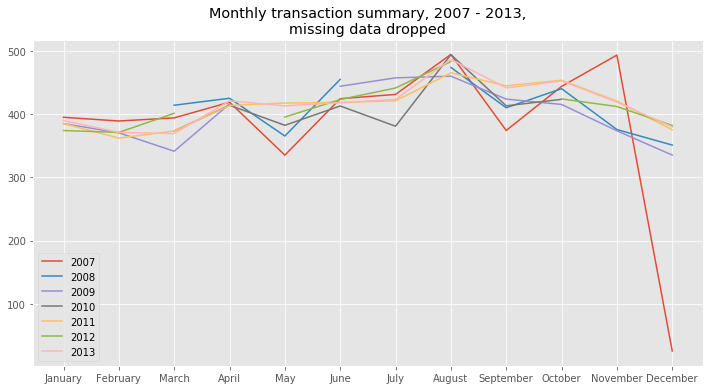

In [61]:
for i in range(1, len(monthly_data.columns)):
  lab = monthly_data.columns[i]
  plt.plot(monthly_data.iloc[:,0],monthly_data.iloc[:,i], label=lab)

plt.title('Monthly transaction summary, 2007 - 2013,\nmissing data dropped')
plt.legend()
plt.show()

In [62]:
for i in range(1, len(monthly_data.columns)):
    monthly_data.iloc[:,i].fillna(monthly_data.iloc[:,i].mean(),
                                inplace=True)

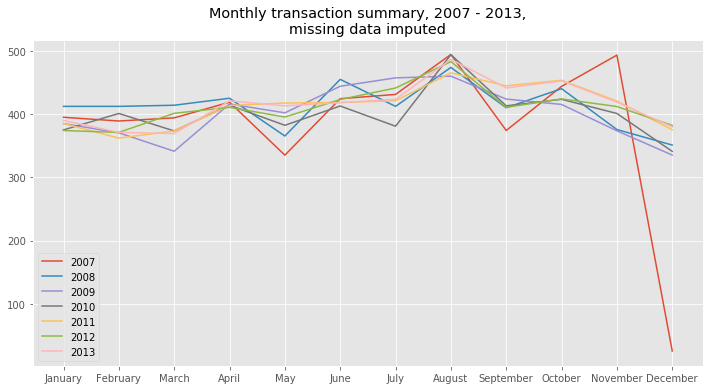

In [63]:
for i in range(1, len(monthly_data.columns)):
    lab = monthly_data.columns[i]
    plt.plot(monthly_data.iloc[:,0],monthly_data.iloc[:,i], label=lab)

plt.title('Monthly transaction summary, 2007 - 2013,\nmissing data imputed')
plt.legend()
plt.show()

### November 2010 Dataset

In [64]:
nov2010_data = pd.read_csv(path+'nov2010_wires.csv').iloc[:17940]

In [65]:
def convert_to_float(x):
    try:
        return float(x)
    except:
        return None

nov2010_data['Transaction Amount'] = nov2010_data['Transaction Amount'].apply(convert_to_float)

In [66]:
def remove_negs(x):
  try:
    if x < 0:
      return None
    else:
      return x
  except:
    print('Closed on Sunday')

In [67]:
nov2010_data['Transaction Amount'] = nov2010_data['Transaction Amount'].apply(remove_negs)

In [68]:
nov2010_data = preprocessing.extract_dt(nov2010_data,'Date of Transaction')

Total time elapsed: 0.06 seconds


In [69]:
import datetime as datetime

nov2010_data.drop(columns = 'hour', inplace=True)

nov2010_data['hour'] = pd.to_datetime(nov2010_data['Time of Transaction']).dt.hour.astype('int')

C:\Users\mohdh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mohdh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


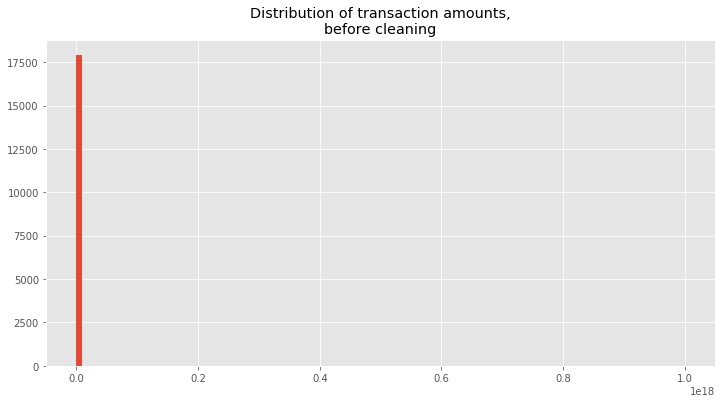

In [70]:
plt.hist(nov2010_data['Transaction Amount'],bins=100)

plt.title('Distribution of transaction amounts,\nbefore cleaning')
plt.show()

In [71]:
def remove_large(x):
  try:
    if x > 1000:
      return None
    else:
      return x
  except:
    print('Closed on Sunday')

In [72]:
nov2010_data['Transaction Amount'] = nov2010_data['Transaction Amount'].apply(remove_large)

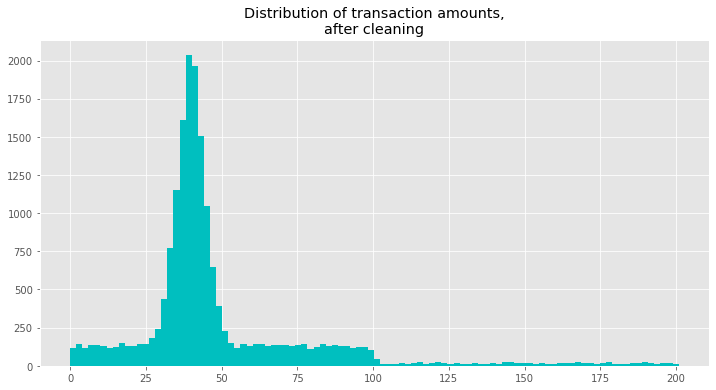

In [73]:
plt.hist(nov2010_data['Transaction Amount'],
         bins=100,
         color='c')

plt.title('Distribution of transaction amounts,\nafter cleaning')
plt.show()

### Amarcord Part II

We were given new information about this particular business:
1. In December, 2007, a major store was flooded and was closed for renovation until March, 2008;
2. In August, 2010, a warehouse belonging to the customer under consideration was sold for $37,900 and the proceeds were deposited into the bank account.

To address (1), we will record Jan and Feb 2008 transactions as 0. For (2), we will reduce the monthly transaction amount by $37,900. This sale should be recognized as an asset sale rather than a business transaction (reflecting operational cash in-flow ). 

In [74]:
monthly_data.iloc[:2,2] = 0
monthly_data.iloc[7,4] = monthly_data.iloc[7,4] - 37.9
monthly_data

,Month,2007,2008,2009,2010,2011,2012,2013
0,January,395.14,0.00,385.200000,375.200,385.25,374.150,390.15
1,February,389.25,0.00,370.550000,401.159,362.15,371.250,371.25
2,March,394.20,414.20,341.440000,373.550,373.55,401.450,369.40
3,April,419.00,425.25,416.210000,414.190,413.75,410.894,421.10
4,May,335.25,365.50,402.160909,382.450,417.70,395.500,413.25
5,June,424.52,455.10,444.250000,413.000,418.60,423.290,418.25
6,July,431.30,412.40,457.500000,381.000,421.20,441.450,423.55
7,August,494.50,474.00,460.180000,456.300,465.48,483.250,486.75
8,September,374.27,410.20,423.910000,413.250,444.91,410.894,441.50
9,October,444.00,440.40,415.450000,423.550,453.70,424.200,452.70


To Do: create time series for monthly data

In [271]:
ls = []
for i in range(2007,2014):
    ls.extend(list(monthly_data[str(i)]))

In [307]:
ls_idx = []
s = '-'
for i in range(2007,2014):
    for j in range(1,13):
        if len(str(j)) < 2:
            j = '0' + str(j)
        else:
            j = str(j)
            
        ls_idx.append(s.join([str(i),j,'01']))

In [318]:
monthly_ts = pd.DataFrame(list(zip(ls_idx,ls)),
                          columns=['Date','Amount'],
                          index=None)

monthly_ts.reset_index(drop=True,inplace=True)
monthly_ts['Date'] = pd.to_datetime(monthly_ts['Date'])
monthly_ts = monthly_ts.set_index('Date')

In [319]:
monthly_ts

,Amount
Date,
2007-01-01,395.14
2007-02-01,389.25
2007-03-01,394.20
2007-04-01,419.00
2007-05-01,335.25
...,...
2013-08-01,486.75
2013-09-01,441.50
2013-10-01,452.70


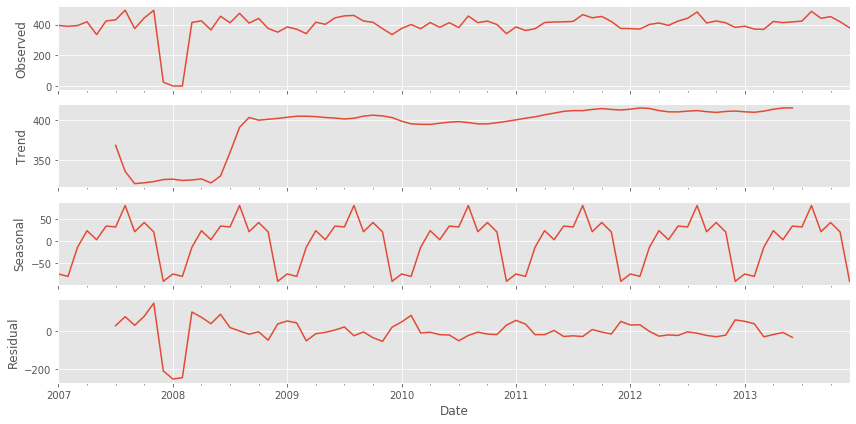

In [321]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(monthly_ts['Amount'], model='additive')
result.plot()

plt.show()

__Executive takeaway:__

Monthly transactions for this client are seasonal. This is expected for most retail businesses (as is the case with this client).

#### Single Month Transactions

In [75]:
nov2010_data = nov2010_data.sort_values(by=['day',
                                            'Time of Transaction']).reset_index(drop=True)

In [76]:
nov_out = nov2010_data[nov2010_data['Trans ID'].str.contains('OUTWT')].reset_index(drop=True)

In [77]:
nov_in = nov2010_data[nov2010_data['Trans ID'].str.contains('INCWT')].reset_index(drop=True)

In [78]:
nov_can = nov2010_data[nov2010_data['Trans ID'].str.contains('\$C')].reset_index(drop=True)

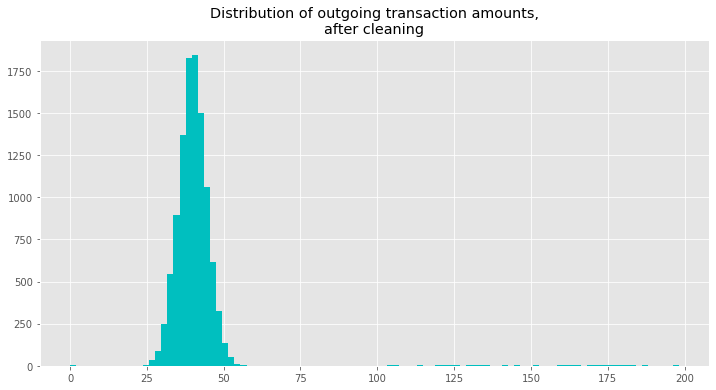

In [79]:
plt.hist(nov_out['Transaction Amount'],
         bins=100,
         color='c')

plt.title('Distribution of outgoing transaction amounts,\nafter cleaning')
plt.show()

In [80]:
print('Records with missing data: ' + str(nov_out['Transaction Amount'].isna().sum()))
nov_out[nov_out['Transaction Amount'].isna()].reset_index(drop=True).head(5)

Records with missing data: 41


,Transaction Amount,Date of Transaction,Time of Transaction,Trans ID,year,month,day,weekday,hour
0,NaN,11/1/2010,1:02,KAJZIZHKUG8100OUTWTUJGBLU,2010,11,1,0,1
1,NaN,11/1/2010,1:03,WJUJDCHDMY7200OUTWTCBLHKA,2010,11,1,0,1
2,NaN,11/1/2010,1:03,NXAGKNTUNB7700OUTWTXXRMBX,2010,11,1,0,1
3,NaN,11/1/2010,1:03,UAGQEAIFCJ8200OUTWTQTIJBI,2010,11,1,0,1
4,NaN,11/1/2010,1:03,EYQZQGSONP6500OUTWTLKEFVG,2010,11,1,0,1


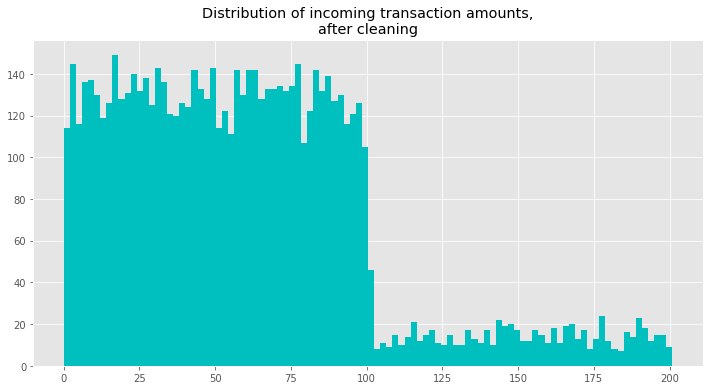

In [81]:
plt.hist(nov_in['Transaction Amount'],
         bins=100,
         color='c')

plt.title('Distribution of incoming transaction amounts,\nafter cleaning')
plt.show()

In [82]:
print('Records with missing data: ' + str(nov_in['Transaction Amount'].isna().sum()))
nov_in[nov_in['Transaction Amount'].isna()].reset_index(drop=True).head(5)

Records with missing data: 0


,Transaction Amount,Date of Transaction,Time of Transaction,Trans ID,year,month,day,weekday,hour


##### Missing value imputation

Below, we replace missing values in the outgoing transactions with 0:

In [83]:
'''
Args:
    x: float or int type
    
Output: original x value or 0
'''
def replace_nan(x):
    if np.isnan(x):
        x = 0
    return x

In [84]:
nov_out['Transaction Amount'] = nov_out['Transaction Amount'].apply(replace_nan)

## Exploratory Data Analysis

In [85]:
'''
Args:
    data: pandas DataFrame type
    time = time intervals desired, defaults to daily intervals
    dataframe = if True, returns pd.DataFrame.groupby object as DataFrame.
                Default False
'''
def raw_plot(data, time = 'hour', dataframe = False):
    assert type(time) == str
    try:
        df = None
        if time == 'day':
            df = pd.DataFrame({'transaction_amount' : \
                               data.groupby('day')\
                               ['Transaction Amount'].sum()\
                              }\
                             ).reset_index()
        else:
            df = pd.DataFrame({'transaction_amount' : \
                               data.groupby(['day',
                                             'hour'])\
                               ['Transaction Amount'].sum()}\
                             )\
                             .reset_index()
        
        df['idx'] = list(df.index)
        
        lab = 'Hourly'
        if time != 'hour':
            lab = 'Daily'
        
        plt.plot(df['idx'],df['transaction_amount'])
        plt.title(lab + ' sum of transactions for Nov 2010')
        plt.show()
        
        if dataframe:
            return df
        
    except:
        print('Error in plotting')
        

### EDA Incoming Transactions

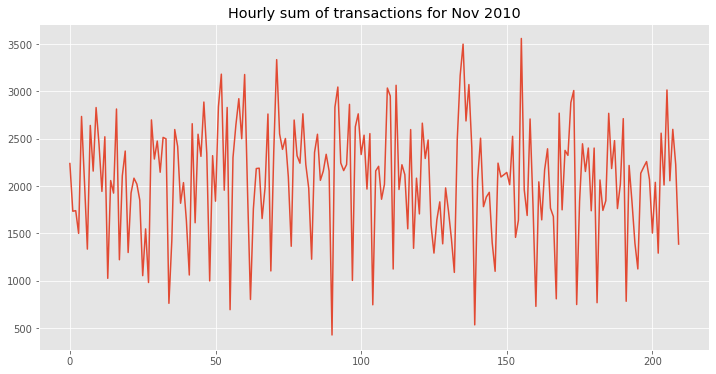

In [86]:
hourly_in = raw_plot(nov_in, time='hour', dataframe=True)

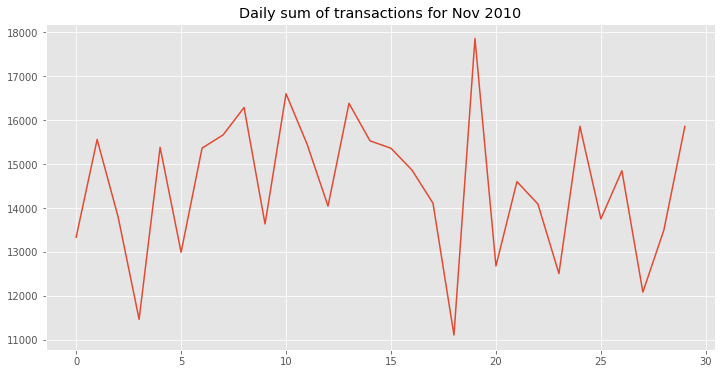

In [87]:
daily_in = raw_plot(nov_in, time='day', dataframe=True)

### EDA Outgoing Transactions

Below, we do some baseline exploratory analysis of the outgoing transactions:

First, the sum of outgoing transactions per hour is plotted. Notice the quiet periods where there are no transactions. This is inherent in the data.

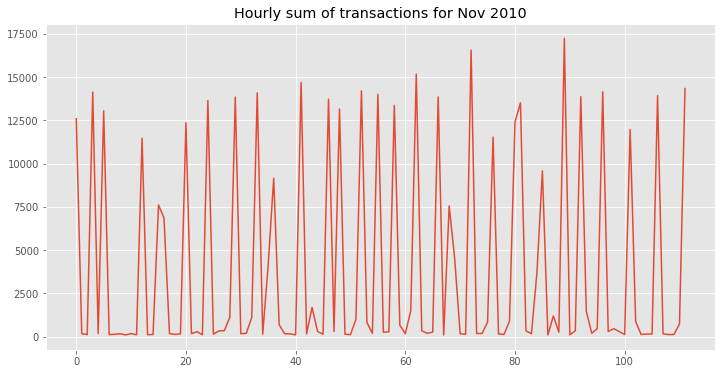

In [88]:
hourly_out = raw_plot(nov_out, time='hour', dataframe=True)

We can also look at outgoing transactions at a daily level. We do this by summing up all transactions for a single day throughout the month.

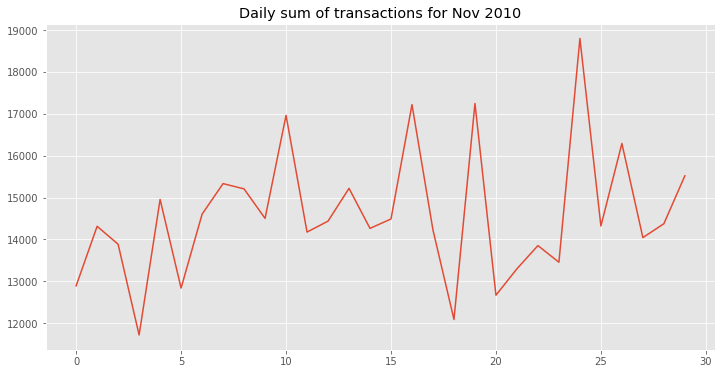

In [89]:
daily_out = raw_plot(nov_out, time='day', dataframe=True)

## Modeling the data

### Building seasonal models using a Fourier series

In [323]:
from sklearn.model_selection import train_test_split

X_f_in = []
for n,a in enumerate(hourly_in.idx):
    x = [1, n, np.sin(2 * n * np.pi / 7), np.cos(2 * n * np.pi / 7)]
    #print(x)
    X_f_in +=[x]

y = list(np.log(hourly_in['transaction_amount']))

X_train, X_test, y_train, y_test = train_test_split(X_f_in,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=False)

#### Hourly intervals - Incoming

In [324]:
import statsmodels.api as sm # Time Series Analysis

reg = sm.OLS(y_train,
             X_train)
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     14.90
Date:                Sun, 17 Nov 2019   Prob (F-statistic):           1.27e-08
Time:                        15:29:26   Log-Likelihood:                -50.135
No. Observations:                 168   AIC:                             108.3
Df Residuals:                     164   BIC:                             120.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6026      0.051    149.878      0.000       7.502       7.703
x1            -0.0003      0.001     -0.509      0.611      -0.001       0.001
x2             0.2037      0.036      5.654      0.000       0.133       0.275
x3            -0.1263      0.036     -3.508      0.001      -0.197      -0.055
==============================================================================
Omnibus:                       19.184   Durbin-Watson:                   2.411
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.785
Skew:                          -0.736   Prob(JB):                     6.84e-06
Kurtosis:                       4.110   Cond. No.                         192.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ADF Statistic: -2.903905
p-value: 0.044896
Critical Values:
	1%: -3.474
	5%: -2.881
	10%: -2.577

We reject the Null Hypothesis (H0) -- the time series is stationary


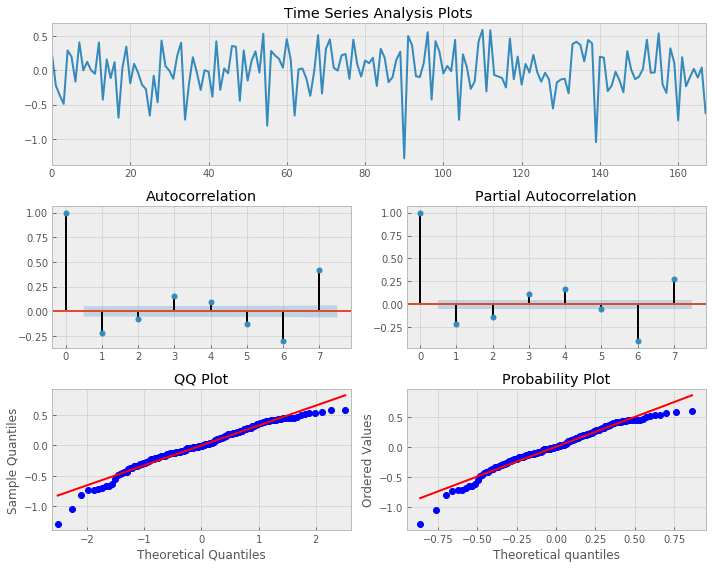

In [325]:
testing.ts_plot(results.resid, lags=7)

In [326]:
N_in = list(range(len(y_train)))
y_hat = results.predict(X_train)

---------------
Hourly Incoming Transactions
---------------


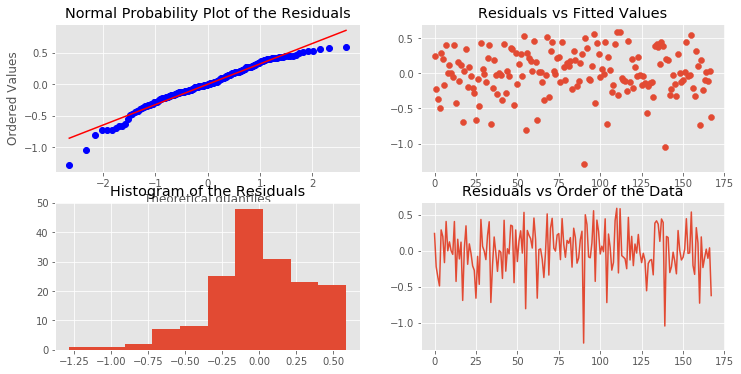

Ljung-Box Test
H_0 (p>0.05) --> The data are independently distributed -- i.e. there's no auto correlations
H_a (p<0.05) --> The data are not independently distributed -- i.e. there is auto correlations
p_values [0.00438749 0.01032715 0.0038873  0.0048509  0.00343002 0.00000792
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
PROBLEM!  There appears to be information left in the residuals


True

In [327]:
print('---------------\n%s\n---------------' % ('Hourly Incoming Transactions'))
testing.eval_plot(N_in, y_train, y_hat)

In [328]:
perf_in = {}
perf_in['daily_incoming'] = testing.measure_error(np.exp(y_train), np.exp(y_hat), label='Hourly Regressors')

+------------+--------------------+
|   metric   |       value        |
+------------+--------------------+
|   label    | Hourly Regressors  |
|    RMSE    |  587.30711370465   |
| RMSE_pcent | 0.2829665827517503 |
+------------+--------------------+


#### Daily Intervals - Incoming

In [340]:
from sklearn.model_selection import train_test_split

X_f_in = []
for n,a in enumerate(daily_in.idx):
    x = [1, n, np.sin(2 * n * np.pi / 7), np.cos(2 * n * np.pi / 7)]
    #print(x)
    X_f_in +=[x]

y = np.array(np.log(daily_in['transaction_amount']))

X_train, X_test, y_train, y_test = train_test_split(X_f_in,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=False)

In [341]:
reg = sm.OLS(y_train,
             X_train)
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                 -0.056
Method:                 Least Squares   F-statistic:                    0.5942
Date:                Sun, 17 Nov 2019   Prob (F-statistic):              0.626
Time:                        15:32:43   Log-Likelihood:                 18.994
No. Observations:                  24   AIC:                            -29.99
Df Residuals:                      20   BIC:                            -25.28
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5868      0.048    201.081      0.000       9.487       9.686
x1            -0.0010      0.004     -0.270      0.790      -0.008       0.006
x2            -0.0130      0.035     -0.373      0.713      -0.086       0.060
x3             0.0442      0.035      1.266      0.220      -0.029       0.117
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   2.573
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.343
Skew:                          -0.177   Prob(JB):                        0.843
Kurtosis:                       2.535   Cond. No.                         26.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ADF Statistic: -2.675934
p-value: 0.078296
Critical Values:
	1%: -3.924
	5%: -3.068
	10%: -2.674

We fail to reject the Null Hypothesis (H0) -- the time series has a unit root and is not stationary


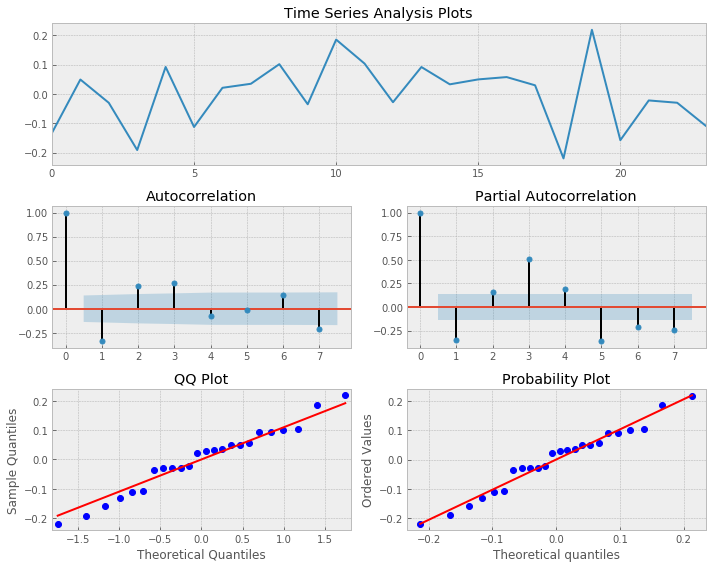

In [342]:
testing.ts_plot(results.resid, lags=7)

In [343]:
N_in = list(range(len(y_train)))
y_hat = results.predict(X_train)

---------------
Daily Incoming Transactions
---------------


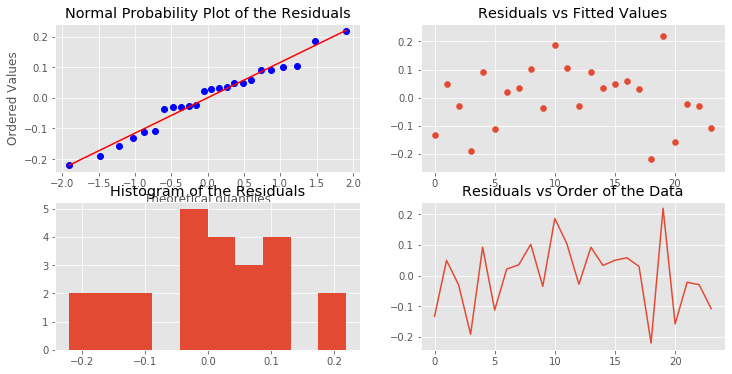

TypeError: iteration over a 0-d array

In [350]:
print('---------------\n%s\n---------------' % ('Daily Incoming Transactions'))
testing.eval_plot(N_in, y_train, y_hat)

In [345]:
perf_in = {}
perf_in['daily_incoming'] = testing.measure_error(np.exp(y_train), np.exp(y_hat), label='Daily Regressors')

+------------+---------------------+
|   metric   |        value        |
+------------+---------------------+
|   label    |   Daily Regressors  |
|    RMSE    |  1561.1835542746499 |
| RMSE_pcent | 0.10745479910228435 |
+------------+---------------------+


#### Hourly intervals - Outgoing

In [99]:
X_f = []
for n,a in enumerate(hourly_out.idx):
    x = [1, n, np.sin(2 * n * np.pi / 7), np.cos(2 * n * np.pi / 7)]
    #print(x)
    X_f +=[x]

In [100]:
import statsmodels.api as sm # Time Series Analysis

reg = sm.OLS(list(hourly_out['transaction_amount']),
             X_f)
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.2884
Date:                Sat, 16 Nov 2019   Prob (F-statistic):              0.834
Time:                        15:08:53   Log-Likelihood:                -1127.1
No. Observations:                 112   AIC:                             2262.
Df Residuals:                     108   BIC:                             2273.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3784.7762   1086.614      3.483      0.001    1630.919    5938.634
x1             2.1374     16.923      0.126      0.900     -31.407      35.682
x2          -707.6681    773.567     -0.915      0.362   -2241.012     825.676
x3             4.2983    772.954      0.006      0.996   -1527.830    1536.427
==============================================================================
Omnibus:                       20.149   Durbin-Watson:                   2.523
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.414
Skew:                           1.076   Prob(JB):                     8.24e-06
Kurtosis:                       2.381   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ADF Statistic: -10.768267
p-value: 0.000000
Critical Values:
	1%: -3.492
	5%: -2.888
	10%: -2.581

We reject the Null Hypothesis (H0) -- the time series is stationary


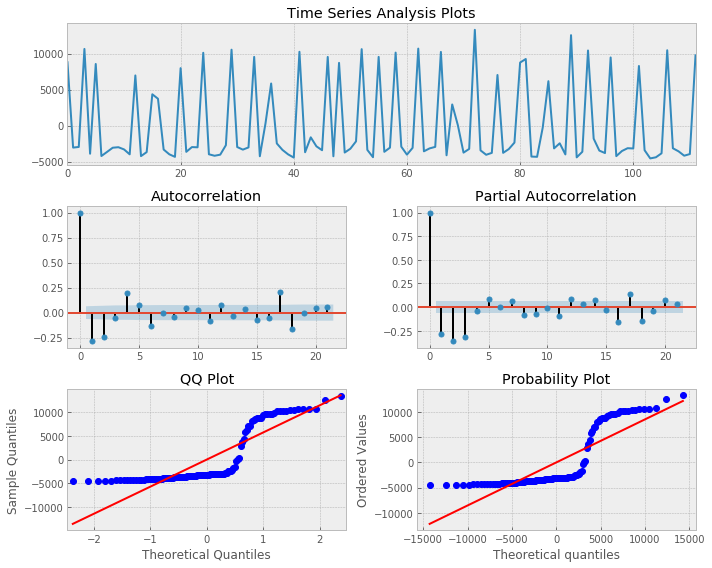

In [101]:
testing.ts_plot(results.resid, lags=21)

#### Daily intervals - Outgoing

In [102]:
X_f = []
for n,a in enumerate(daily_out.idx):
    x = [1, n, np.sin(2 * n * np.pi / 7), np.cos(2 * n * np.pi / 7)]
    #print(x)
    X_f +=[x]

In [103]:
reg = sm.OLS(list(daily_out['transaction_amount']),
             X_f)
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.9171
Date:                Sat, 16 Nov 2019   Prob (F-statistic):              0.446
Time:                        15:08:55   Log-Likelihood:                -261.34
No. Observations:                  30   AIC:                             530.7
Df Residuals:                      26   BIC:                             536.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.391e+04    565.083     24.621      0.000    1.28e+04    1.51e+04
x1            46.3513     33.485      1.384      0.178     -22.479     115.181
x2           255.0156    415.332      0.614      0.545    -598.711    1108.742
x3          -347.3136    404.060     -0.860      0.398   -1177.871     483.244
==============================================================================
Omnibus:                        0.391   Durbin-Watson:                   2.583
Prob(Omnibus):                  0.822   Jarque-Bera (JB):                0.353
Skew:                           0.234   Prob(JB):                        0.838
Kurtosis:                       2.749   Cond. No.                         33.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ADF Statistic: -7.073614
p-value: 0.000000
Critical Values:
	1%: -3.679
	5%: -2.968
	10%: -2.623

We reject the Null Hypothesis (H0) -- the time series is stationary


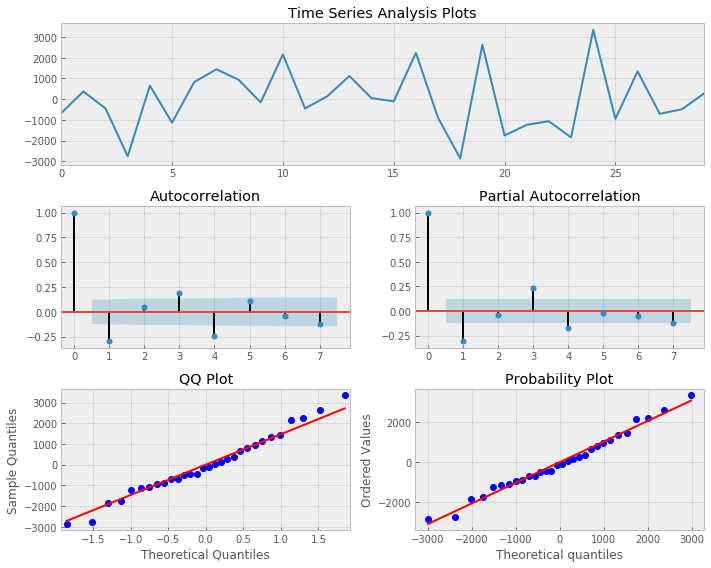

In [104]:
testing.ts_plot(results.resid, lags=7)

## SARIMA Model

### Hourly Incoming Transactions

ADF Statistic: -2.661351
p-value: 0.080968
Critical Values:
	1%: -3.474
	5%: -2.881
	10%: -2.577

We fail to reject the Null Hypothesis (H0) -- the time series has a unit root and is not stationary


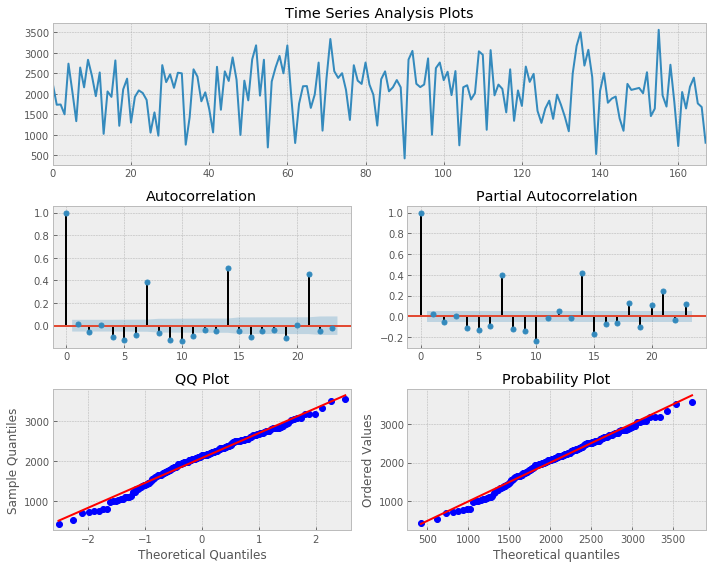

In [155]:
testing.ts_plot(y_train)

_d_ = 1

ADF Statistic: -6.033526
p-value: 0.000000
Critical Values:
	1%: -3.474
	5%: -2.881
	10%: -2.577

We reject the Null Hypothesis (H0) -- the time series is stationary


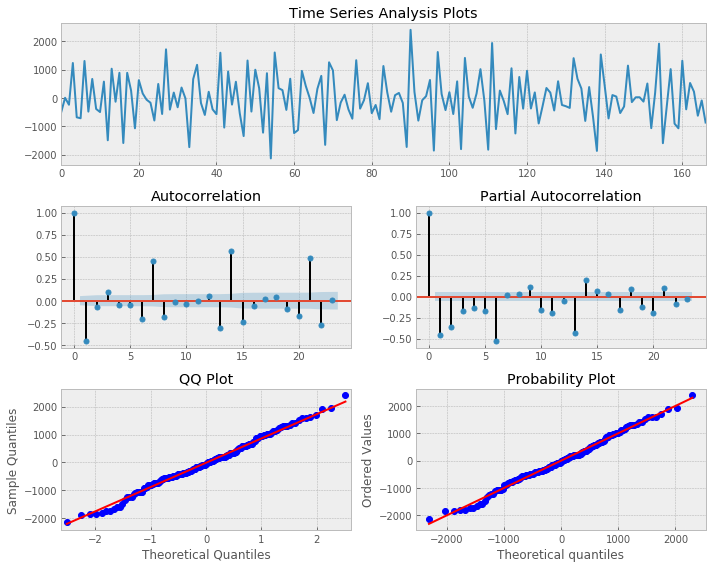

In [161]:
d_1 = np.array(y_train)[1:] - np.array(y_train)[:-1]
testing.ts_plot(d_1)

_d_ = 2

C:\Users\mohdh\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


ADF Statistic: -7.684343
p-value: 0.000000
Critical Values:
	1%: -3.474
	5%: -2.881
	10%: -2.577

We reject the Null Hypothesis (H0) -- the time series is stationary


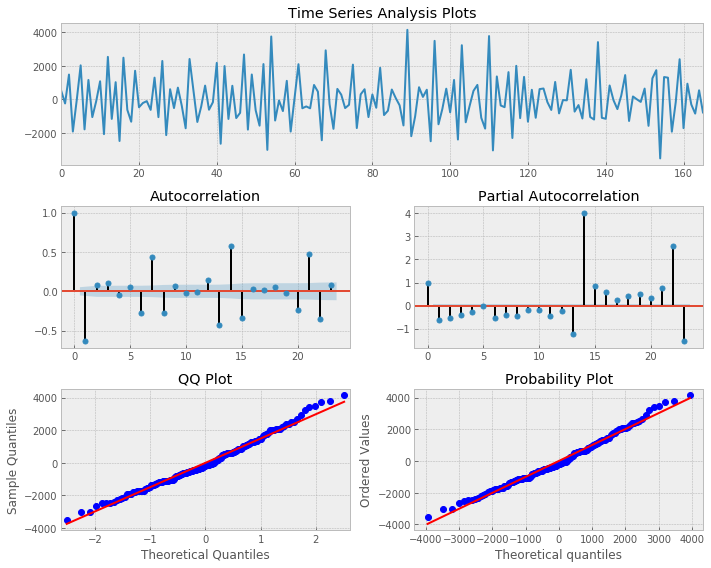

In [165]:
d_2 = d_1[1:] - d_1[:-1]
testing.ts_plot(d_2)

_d_ = 2 outperforms _d_ = 1, so we will use a _d_ = 2 when specifying SARIMA

__Estimating big D__

Below, we estimate D with _d_ = 1

ADF Statistic: -5.748854
p-value: 0.000001
Critical Values:
	1%: -3.476
	5%: -2.882
	10%: -2.577

We reject the Null Hypothesis (H0) -- the time series is stationary


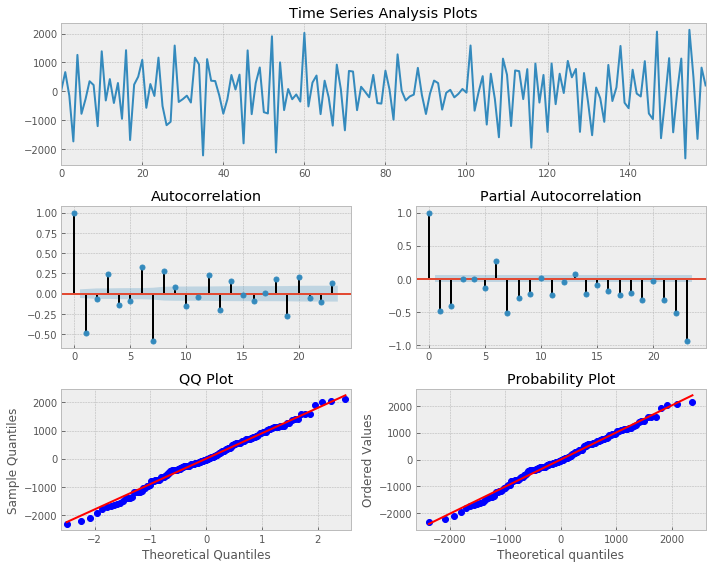

In [171]:
d_1_1 = d_1[7:] - d_1[:-7]
testing.ts_plot(d_1_1)

d = 2 outperforms (d = 1, D = 1)

### SARIMA (2,2,1) (1,0,1,7) Model

In [172]:
y = list(hourly_in['transaction_amount'])

y_train, y_test = train_test_split(y,
                                   test_size=0.2,
                                   random_state=42,
                                   shuffle=False)

In [174]:
sarima = sm.tsa.statespace.SARIMAX

model = sarima(y_train, trend='n', order=(2,2,1), seasonal_order=(1,0,1,7))
f = model.fit()
print(f.summary())

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                  168
Model:             SARIMAX(2, 2, 1)x(1, 0, 1, 7)   Log Likelihood               -1274.694
Date:                           Sat, 16 Nov 2019   AIC                           2561.388
Time:                                   16:04:12   BIC                           2580.060
Sample:                                        0   HQIC                          2568.967
                                           - 168                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6537      0.068     -9.668      0.000      -0.786      -0.521
ar.L2         -0.3695      0.074     -4.996

In [179]:
N_in = list(range(len(y_train)))

y_raw = f.fittedvalues
y_hat = [y_raw[2],y_raw[2]] + list(y_raw[2:])
len(y_hat)

168

---------------
Box Cox Adjusted Data
---------------


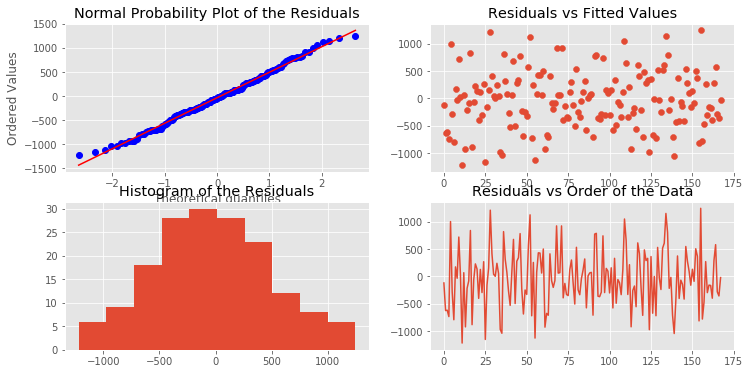

Ljung-Box Test
H_0 (p>0.05) --> The data are independently distributed -- i.e. there's no auto correlations
H_a (p<0.05) --> The data are not independently distributed -- i.e. there is auto correlations
p_values [0.61190564 0.53447743 0.20814517 0.28089363 0.35857466 0.4292956
 0.34641814 0.37991606 0.47793739 0.38493176 0.44163158 0.13248971
 0.17822379 0.11910371 0.13605205 0.17633981 0.17702657 0.18653114
 0.19206745 0.19470983]
There does not appear to be information left in the residuals
+------------+------------------------+
|   metric   |         value          |
+------------+------------------------+
|   label    | SARIMA(2,2,1)(1,0,1)_7 |
|    RMSE    |   524.2977906290009    |
| RMSE_pcent |  0.25260847467478315   |
+------------+------------------------+


In [180]:
print('---------------\n%s\n---------------' % ('Box Cox Adjusted Data'))
testing.eval_plot(N_in, y_train, y_hat)
perf_in['SARIMA(2,2,1)(1,0,1)_7'] = testing.measure_error(y_train, y_hat, label='SARIMA(2,2,1)(1,0,1)_7')

### SARIMA (2,2,2) (2,0,1,7)

In [181]:
model = sarima(y_train, trend='n', order=(2,2,2), seasonal_order=(2,0,1,7))
f = model.fit()
print(f.summary())

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                  168
Model:             SARIMAX(2, 2, 2)x(2, 0, 1, 7)   Log Likelihood               -1298.547
Date:                           Sat, 16 Nov 2019   AIC                           2613.094
Time:                                   16:10:32   BIC                           2637.990
Sample:                                        0   HQIC                          2623.199
                                           - 168                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1808      0.194      0.931      0.352      -0.200       0.561
ar.L2          0.0453      0.177      0.256

C:\Users\mohdh\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [182]:
N_in = list(range(len(y_train)))

y_raw = f.fittedvalues
y_hat = [y_raw[2],y_raw[2]] + list(y_raw[2:])
len(y_hat)

168

---------------
Box Cox Adjusted Data
---------------


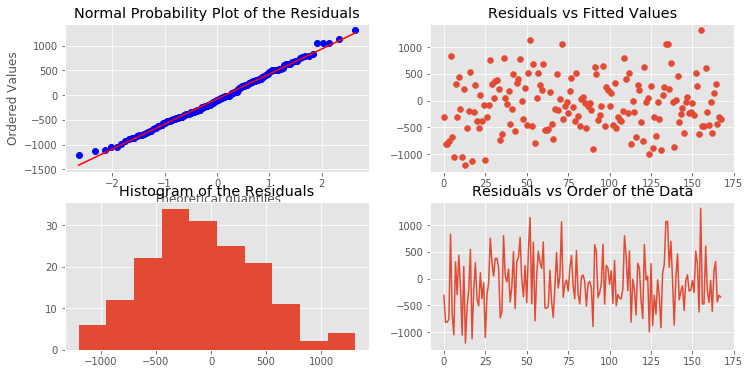

Ljung-Box Test
H_0 (p>0.05) --> The data are independently distributed -- i.e. there's no auto correlations
H_a (p<0.05) --> The data are not independently distributed -- i.e. there is auto correlations
p_values [0.55825036 0.75061989 0.30326622 0.41882068 0.55966438 0.68535268
 0.76384565 0.78166799 0.85324043 0.66622883 0.74455518 0.50283644
 0.57987627 0.64499333 0.71130969 0.77307101 0.819305   0.78687509
 0.80046349 0.67927012]
There does not appear to be information left in the residuals
+------------+------------------------+
|   metric   |         value          |
+------------+------------------------+
|   label    | SARIMA(2,2,2)(2,0,1,7) |
|    RMSE    |   507.25522784390387   |
| RMSE_pcent |  0.24439730944265853   |
+------------+------------------------+


In [184]:
print('---------------\n%s\n---------------' % ('Box Cox Adjusted Data'))
testing.eval_plot(N_in, y_train, y_hat)
perf_in['SARIMA(2,2,2)(2,0,1,7)'] = testing.measure_error(y_train, y_hat, label='SARIMA(2,2,2)(2,0,1,7)')

### SARIMA (2,2,2)(1,0,1,7)

In [217]:
model = sarima(y_train, trend='n', order=(2,2,2), seasonal_order=(1,0,1,7))
f = model.fit()
print(f.summary())

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                  168
Model:             SARIMAX(2, 2, 2)x(1, 0, 1, 7)   Log Likelihood               -1284.768
Date:                           Sat, 16 Nov 2019   AIC                           2583.535
Time:                                   16:17:50   BIC                           2605.319
Sample:                                        0   HQIC                          2592.377
                                           - 168                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1706      0.178      0.959      0.338      -0.178       0.519
ar.L2          0.1250      0.023      5.376

C:\Users\mohdh\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [218]:
N_in = list(range(len(y_train)))

y_raw = f.fittedvalues
y_hat = [y_raw[2],y_raw[2]] + list(y_raw[2:])
len(y_hat)

168

---------------
Box Cox Adjusted Data
---------------


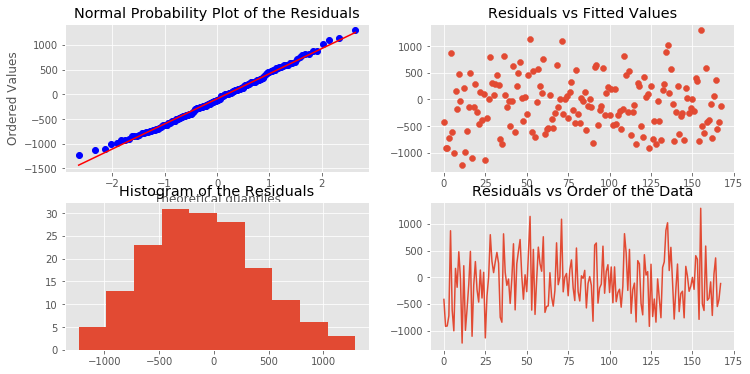

Ljung-Box Test
H_0 (p>0.05) --> The data are independently distributed -- i.e. there's no auto correlations
H_a (p<0.05) --> The data are not independently distributed -- i.e. there is auto correlations
p_values [0.58178445 0.56798173 0.2077242  0.28990101 0.41629761 0.53999673
 0.21862378 0.26327362 0.33523781 0.2066436  0.27328405 0.08858703
 0.11603104 0.09798335 0.13074159 0.16721023 0.2128863  0.21133712
 0.20453306 0.15413615]
There does not appear to be information left in the residuals
+------------+------------------------+
|   metric   |         value          |
+------------+------------------------+
|   label    | SARIMA(2,2,2)(2,0,1,7) |
|    RMSE    |   511.04991539781804   |
| RMSE_pcent |  0.24622560292776297   |
+------------+------------------------+


In [219]:
print('---------------\n%s\n---------------' % ('Box Cox Adjusted Data'))
testing.eval_plot(N_in, y_train, y_hat)
perf_in['SARIMA(2,2,2)(2,0,1,7)'] = testing.measure_error(y_train, y_hat, label='SARIMA(2,2,2)(2,0,1,7)')

### Daily Incoming Transaction

In [220]:
y = list(daily_in['transaction_amount'])

y_train, y_test = train_test_split(y,
                                   test_size=0.2,
                                   random_state=42,
                                   shuffle=False)

C:\Users\mohdh\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


ADF Statistic: -6.088545
p-value: 0.000000
Critical Values:
	1%: -3.753
	5%: -2.998
	10%: -2.639

We reject the Null Hypothesis (H0) -- the time series is stationary


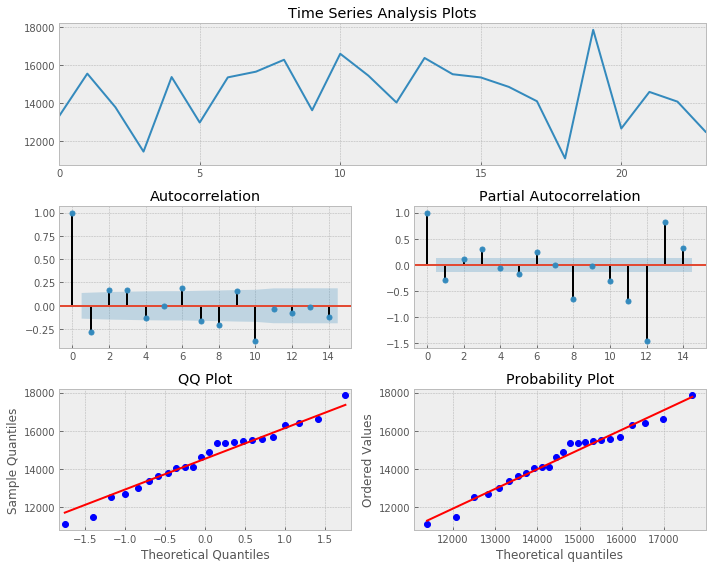

In [221]:
testing.ts_plot(y_train)

C:\Users\mohdh\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


ADF Statistic: -6.845172
p-value: 0.000000
Critical Values:
	1%: -3.788
	5%: -3.013
	10%: -2.646

We reject the Null Hypothesis (H0) -- the time series is stationary


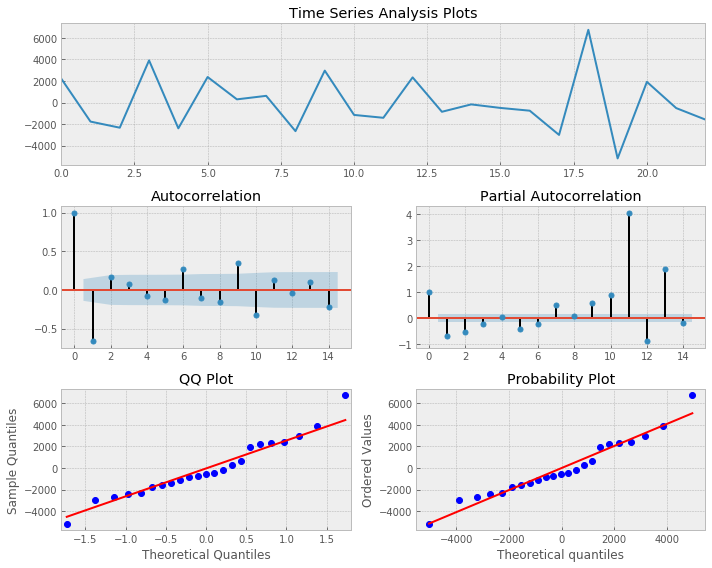

In [222]:
d_1 = np.array(y_train)[1:] - np.array(y_train)[:-1]
testing.ts_plot(d_1)

Go with _d_ = 1, _D_ = 0

In [238]:
model = sarima(y_train, trend='n', order=(2,1,1))#, seasonal_order=(1,0,1,7))
f = model.fit()
print(f.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                   24
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -211.108
Date:                Sat, 16 Nov 2019   AIC                            430.216
Time:                        16:39:42   BIC                            434.758
Sample:                             0   HQIC                           431.359
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0643      0.630     -0.102      0.919      -1.300       1.171
ar.L2         -0.0989      0.352     -0.281      0.779      -0.788       0.590
ma.L1         -0.3797      0.642     -0.592      0.5

## Holt-Winters Model - Daily Incoming

In [239]:
y = list(daily_in['transaction_amount'])

y_train, y_test = train_test_split(y,
                                   test_size=0.2,
                                   random_state=42,
                                   shuffle=False)

In [243]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw = ExponentialSmoothing(np.array(y_train),trend='multiplicative',seasonal='mul',seasonal_periods=7)
fit_hw = hw.fit()

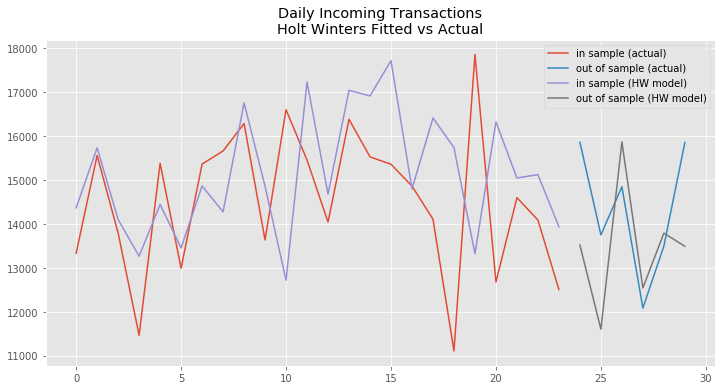

In [253]:
'''
Code adapted from Dan Trepanier, lecture 5.0 Smoothing
'''

IND = {'in':list(range(len(y_train))), 'out': len(y_train) + np.arange(len(y_test))}

HW = {'in': list(fit_hw.fittedvalues),
      'out': list(fit_hw.forecast(len(y_test)))}

plt.plot(IND['in'], y_train, label='in sample (actual)')
plt.plot(IND['out'], y_test, label='out of sample (actual)')

plt.plot(IND['in'], HW['in'], label='in sample (HW model)')
plt.plot(IND['out'], HW['out'], label='out of sample (HW model)')

plt.legend()
plt.title('Daily Incoming Transactions\nHolt Winters Fitted vs Actual')
plt.show()

In [260]:
from sklearn.metrics import mean_squared_error
import statistics
import math

rmse1_in = math.sqrt(mean_squared_error(y_train, HW['in']))
rmse1_in_pct = rmse1_in / statistics.mean(y_train)

rmse1_out = math.sqrt(mean_squared_error(y_test, HW['out']))
rmse1_out_pct = rmse1_out / statistics.mean(y_test)

In [261]:
rmse1_in_pct, rmse1_out_pct

(0.14047995065437321, 0.11764348682090925)